In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mt
from scipy.special import gamma, comb
from random import shuffle

In [20]:
class ProbabilisticAnalyser:

    def __init__(self, u):
        self.obs = []
        self.count = 165
        self.heads = 0
        for i in range(165):
            x = 1 if (i <= int(u * 165)) else 0
            self.obs.append(x)
            self.heads += x
        shuffle(self.obs)
        print(self.obs)
        
    def beta_plotter(self, a, b, idx):
        prob, xs, u = [], [], 0
        norm_fac = (gamma(a+b)/(gamma(a)*gamma(b)))
        while u <= 1:
            pval = norm_fac * (u ** (a-1)) * ((1-u) ** (b-1))
            prob.append(pval)
            xs.append(u)
            u += 1e-5

        # plotting the graphs
        plt.figure(1)
        ax = plt.gca()
        ax.set_ylim(0, 12)
        plt.xlabel("u")
        plt.ylabel("prob")
        ax.xaxis.set_major_locator(mt.FixedLocator([i*0.1 for i in range(1, 1)]))
        ax.plot(xs, prob, linewidth=2, marker='.', markersize=0.25)
        plt.savefig("Fig_" + str(idx) + ".png")
        # plt.close(1)

    def sequential_bayesian(self):
        count = 0
        a, b = 2, 3
        for ob in self.obs:
            print("mean =", (a/(a+b)))
            # self.beta_plotter(a, b, count)
            if ob == 0:
                a, b = a, b+1
            if ob == 1:
                a, b = a+1, b
            count += 1
        print("final mean =", (a/(a+b)))
        # self.beta_plotter(a, b, count)

    def concurrent_bayesian(self):
        a, b = 2, 3
        m, N = self.heads, self.count
        a += m
        b += N-m
        print("final mean =", (a/(a+b)))
        self.beta_plotter(a, b, 0)

[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
mean = 0.4
mean = 0.5
mean = 0.42857142857142855
mean = 0.5
mean = 0.5555555555555556
mean = 0.5
mean = 0.45454545454545453
mean = 0.5
mean = 0.5384615384615384
mean = 0.5
mean = 0.4666666666666667
mean = 0.4375
mean = 0.4117647058823529
mean = 0.4444444444444444
mean = 0.42105263157894735
mean = 0.45
mean = 0.42857142857142855
mean = 0.45454545454545453
mean = 0.4782608695652174
mean = 0.4583333333333333
mean = 0.48
mean = 0.46153846153846156
mean = 0.4444444444444444
mean = 0.4642857142857143
mean

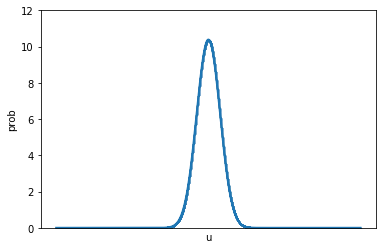

In [21]:
analyser = ProbabilisticAnalyser(0.20)
analyser.sequential_bayesian()
analyser.concurrent_bayesian()